In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/cocoza4/workspace/absorouteio/asr-face-recognition/src')

import os
import numpy as np
import pandas as pd
from pathlib import Path
from PIL import Image
import tensorflow as tf

import align
from align import detect_face

tf.__version__

'2.1.0'

In [2]:
cfp_path = Path('/home/cocoza4/datasets/cfp-dataset')
frontal_path = cfp_path / 'Protocol/Pair_list_F.txt'
profile_path = cfp_path / 'Protocol/Pair_list_P.txt'
profile_split_path = cfp_path / 'Protocol/FP'
frontal_split_path = cfp_path / 'Protocol/FF'
split_ff_path = cfp_path / 'Protocol/Split/FF'
split_fp_path = cfp_path / 'Protocol/Split/FP'
images_path = cfp_path / 'Data/Images'

front_output_path = Path('/home/cocoza4/datasets/cfp-front')
profile_output_path = Path('/home/cocoza4/datasets/cfp_profile')

align_path = Path('/home/cocoza4/datasets/cfp_front_mtcnn_margin32')

In [3]:
width = 112
height = 112

In [4]:

def get_mapping(frontal_path):
    df = pd.read_csv(frontal_path, sep=' ', header=None, names=['id', 'file'])
    return {row['id']: row['file'].replace('../Data/Images/', '') for _, row in df.iterrows()}

# Save Images

In [5]:
ff_mapping = get_mapping(frontal_path)
len(ff_mapping)

5000

In [6]:
fp_mapping = get_mapping(profile_path)
len(fp_mapping)

2000

In [42]:
df_pairs_ff = pd.DataFrame.from_dict(ff_mapping, orient='index').reset_index()
df_pairs_ff[0] = df_pairs_ff[0].map(lambda x: x.replace('/frontal', '').replace('jpg', 'png'))
df_pairs_ff.to_csv(front_output_path/'pair_list_ff.csv', index=False, header=None)

In [41]:
df_pairs_fp = pd.DataFrame.from_dict(fp_mapping, orient='index').reset_index()
df_pairs_fp[0] = df_pairs_fp[0].map(lambda x: x.replace('/profile', ''))
df_pairs_fp.to_csv(front_output_path/'pair_list_fp.csv', index=False, header=None)

In [14]:
frontal_images = list(ff_mapping.values())
frontal_images

['001/frontal/01.jpg',
 '001/frontal/02.jpg',
 '001/frontal/03.jpg',
 '001/frontal/04.jpg',
 '001/frontal/05.jpg',
 '001/frontal/06.jpg',
 '001/frontal/07.jpg',
 '001/frontal/08.jpg',
 '001/frontal/09.jpg',
 '001/frontal/10.jpg',
 '002/frontal/01.jpg',
 '002/frontal/02.jpg',
 '002/frontal/03.jpg',
 '002/frontal/04.jpg',
 '002/frontal/05.jpg',
 '002/frontal/06.jpg',
 '002/frontal/07.jpg',
 '002/frontal/08.jpg',
 '002/frontal/09.jpg',
 '002/frontal/10.jpg',
 '003/frontal/01.jpg',
 '003/frontal/02.jpg',
 '003/frontal/03.jpg',
 '003/frontal/04.jpg',
 '003/frontal/05.jpg',
 '003/frontal/06.jpg',
 '003/frontal/07.jpg',
 '003/frontal/08.jpg',
 '003/frontal/09.jpg',
 '003/frontal/10.jpg',
 '004/frontal/01.jpg',
 '004/frontal/02.jpg',
 '004/frontal/03.jpg',
 '004/frontal/04.jpg',
 '004/frontal/05.jpg',
 '004/frontal/06.jpg',
 '004/frontal/07.jpg',
 '004/frontal/08.jpg',
 '004/frontal/09.jpg',
 '004/frontal/10.jpg',
 '005/frontal/01.jpg',
 '005/frontal/02.jpg',
 '005/frontal/03.jpg',
 '005/front

# Save Front Face Images

In [46]:
for path in frontal_images:
    img = Image.open(images_path/path)
    splits = path.split('/')
    img_id = splits[0]
    out_dir = (front_output_path/img_id)
    out_file = out_dir/splits[-1]
    if not out_dir.exists():
        out_dir.mkdir()
    img.save(out_file)


# Save Front Profile Images

In [7]:
for path in fp_mapping.values():
    img = Image.open(images_path/path).resize((width, height))
    splits = path.split('/')
    img_id = splits[0]
    out_dir = (profile_output_path/img_id)
    out_file = out_dir/splits[-1]
    if not out_dir.exists():
        out_dir.mkdir()
    img.save(out_file)

In [7]:
fp_mapping = get_mapping(profile_path)
len(fp_mapping)

2000

In [10]:
for d in split_ff_path.iterdir():
    fold = int(d.name)
    same_path = d / 'same.txt'
    diff_path = d / 'diff.txt'
    df_same = pd.read_csv(same_path, header=None, names=['id1', 'id2'])
    df_same['same'] = 1
    df_diff = pd.read_csv(diff_path, header=None, names=['id1', 'id2'])
    df_diff['same'] = 0
    
    df_fold = pd.concat([df_same, df_diff], axis=0)
    df_fold.to_csv(front_output_path/f'ff_fold_{fold}.csv', index=False)
    
#     for _, row in df_same.iterrows():
#         img_id1 = images_path / ff_mapping[row['id1']]
#         img_id2 = images_path / ff_mapping[row['id2']]
        
#     for _, row in df_diff.iterrows():
#         img_id1 = images_path / ff_mapping[row['id1']]
#         img_id2 = images_path / ff_mapping[row['id2']]
        
    

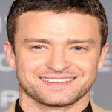

In [55]:
Image.open(img_id1).resize((112, 112))

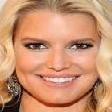

In [56]:
Image.open(img_id2).resize((112, 112))

In [25]:
fp_mapping

{1: '001/profile/01.jpg',
 2: '001/profile/02.jpg',
 3: '001/profile/03.jpg',
 4: '001/profile/04.jpg',
 5: '002/profile/01.jpg',
 6: '002/profile/02.jpg',
 7: '002/profile/03.jpg',
 8: '002/profile/04.jpg',
 9: '003/profile/01.jpg',
 10: '003/profile/02.jpg',
 11: '003/profile/03.jpg',
 12: '003/profile/04.jpg',
 13: '004/profile/01.jpg',
 14: '004/profile/02.jpg',
 15: '004/profile/03.jpg',
 16: '004/profile/04.jpg',
 17: '005/profile/01.jpg',
 18: '005/profile/02.jpg',
 19: '005/profile/03.jpg',
 20: '005/profile/04.jpg',
 21: '006/profile/01.jpg',
 22: '006/profile/02.jpg',
 23: '006/profile/03.jpg',
 24: '006/profile/04.jpg',
 25: '007/profile/01.jpg',
 26: '007/profile/02.jpg',
 27: '007/profile/03.jpg',
 28: '007/profile/04.jpg',
 29: '008/profile/01.jpg',
 30: '008/profile/02.jpg',
 31: '008/profile/03.jpg',
 32: '008/profile/04.jpg',
 33: '009/profile/01.jpg',
 34: '009/profile/02.jpg',
 35: '009/profile/03.jpg',
 36: '009/profile/04.jpg',
 37: '010/profile/01.jpg',
 38: '010/

In [ ]:
for 

In [24]:
for d in split_fp_path.iterdir():
    fold = int(d.name)
    same_path = d / 'same.txt'
    diff_path = d / 'diff.txt'
    df_same = pd.read_csv(same_path, header=None, names=['id1', 'id2'])
    df_same['same'] = 1
    df_diff = pd.read_csv(diff_path, header=None, names=['id1', 'id2'])
    df_diff['same'] = 0
    
    df_fold = pd.concat([df_same, df_diff], axis=0)
    df_fold.to_csv(profile_output_path/f'fp_fold_{fold}.csv', index=False)

In [21]:
ff_mapping[2007], fp_mapping[801]

('201/frontal/07.jpg', '201/profile/01.jpg')

In [22]:
ff_mapping[2005], fp_mapping[802]

('201/frontal/05.jpg', '201/profile/02.jpg')

In [23]:
ff_mapping[2498], fp_mapping[986]

('250/frontal/08.jpg', '247/profile/02.jpg')

In [18]:
df_fold

,id1,id2,same
0,2007,801,1
1,2005,802,1
2,2010,802,1
3,2008,803,1
4,2010,804,1
...,...,...,...
345,2500,920,0
346,2493,974,0
347,2494,845,0
348,2495,972,0


# Verify all aligned images exist

These non-existing images have to be manually aligned instead.

In [5]:
def get_png_file(path):
    path = Path(path)
    id_ = path.parts[0]
    file = path.stem
    return Path(id_) / f'{file}.png'

In [6]:
not_found = set()

for fold in sorted(align_path.glob('fold*.csv')):
    print('-'*60)
    print(fold)
    print('-'*60)
    df_fold = pd.read_csv(fold)
    
    fold_not_found = set()
    for _, row in df_fold.iterrows():
        img1 = align_path / get_png_file(ff_mapping[row['id1']])
        img2 = align_path / get_png_file(ff_mapping[row['id2']])

        if not img1.exists():
            fold_not_found.add((str(img1)))

        if not img2.exists():
            fold_not_found.add((str(img2)))
    
    not_found.update(fold_not_found)
    
    if fold_not_found:
        print('\n'.join(fold_not_found))
        print('-'*60)


------------------------------------------------------------
/home/cocoza4/datasets/cfp_front_mtcnn_margin32/fold_1.csv
------------------------------------------------------------
/home/cocoza4/datasets/cfp_front_mtcnn_margin32/025/06.png
/home/cocoza4/datasets/cfp_front_mtcnn_margin32/012/06.png
/home/cocoza4/datasets/cfp_front_mtcnn_margin32/019/07.png
/home/cocoza4/datasets/cfp_front_mtcnn_margin32/011/09.png
------------------------------------------------------------
------------------------------------------------------------
/home/cocoza4/datasets/cfp_front_mtcnn_margin32/fold_10.csv
------------------------------------------------------------
/home/cocoza4/datasets/cfp_front_mtcnn_margin32/457/06.png
------------------------------------------------------------
------------------------------------------------------------
/home/cocoza4/datasets/cfp_front_mtcnn_margin32/fold_2.csv
------------------------------------------------------------
/home/cocoza4/datasets/cfp_front_mtcnn_

In [7]:
not_found

{'/home/cocoza4/datasets/cfp_front_mtcnn_margin32/011/09.png',
 '/home/cocoza4/datasets/cfp_front_mtcnn_margin32/012/06.png',
 '/home/cocoza4/datasets/cfp_front_mtcnn_margin32/019/07.png',
 '/home/cocoza4/datasets/cfp_front_mtcnn_margin32/025/06.png',
 '/home/cocoza4/datasets/cfp_front_mtcnn_margin32/053/04.png',
 '/home/cocoza4/datasets/cfp_front_mtcnn_margin32/053/07.png',
 '/home/cocoza4/datasets/cfp_front_mtcnn_margin32/183/06.png',
 '/home/cocoza4/datasets/cfp_front_mtcnn_margin32/457/06.png'}

In [137]:
gpu_memory_fraction = 1.

In [138]:
with tf.Graph().as_default():
    gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=gpu_memory_fraction)
    sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options, log_device_placement=False))
    with sess.as_default():
        pnet, rnet, onet = detect_face.create_mtcnn(sess, None)

W0409 02:28:34.691146 139856290694976 deprecation.py:506] From /home/cocoza4/ENVs/ar-models/lib/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1635: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W0409 02:28:34.857955 139856290694976 deprecation.py:323] From /home/cocoza4/workspace/absorouteio/asr-face-recognition/src/align/detect_face.py:213: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [139]:
minsize = 20 # minimum size of face
threshold = [ 0.6, 0.7, 0.7 ]  # three steps's threshold
factor = 0.709 # scale factor

w = 112
h = 112

In [140]:
not_found

{'/home/cocoza4/datasets/cfp_front_mtcnn_margin32/011/09.png',
 '/home/cocoza4/datasets/cfp_front_mtcnn_margin32/012/06.png',
 '/home/cocoza4/datasets/cfp_front_mtcnn_margin32/019/07.png',
 '/home/cocoza4/datasets/cfp_front_mtcnn_margin32/025/06.png',
 '/home/cocoza4/datasets/cfp_front_mtcnn_margin32/053/04.png',
 '/home/cocoza4/datasets/cfp_front_mtcnn_margin32/053/07.png',
 '/home/cocoza4/datasets/cfp_front_mtcnn_margin32/183/06.png',
 '/home/cocoza4/datasets/cfp_front_mtcnn_margin32/457/06.png'}